In [2]:
import sys
sys.path.append('../3output_model')
from generator_class_atmo_3output import DataGenerator_3output_train
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

2025-03-04 15:44:35.450437: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-04 15:44:35.458005: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-04 15:44:35.466052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-04 15:44:35.468384: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-04 15:44:35.475051: I tensorflow/core/platform/cpu_feature_guar

In [3]:
n_channels = 3
dimensions = (300, 300)
params = {'batch_size': 100,'dim':dimensions, 'n_channels':n_channels}

In [6]:
path_to_df = '../3output_model/pkl_files/test_file.pkl'
df = pd.read_pickle(path_to_df)
generator = DataGenerator_3output_train(df, **params)

In [7]:
df

,NuPDG,NuEnergy,LepEnergy,Interaction,NProton,NPion,NPizero,NNeutron,is_antineutrino,image_path,flavour,protons,pions,pizeros,neutrons
0,1,0.515776,0.120392,1,1,0,0,1,0,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,0,1,0,0,1
1,-14,4.841860,2.446960,1,1,1,1,1,1,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,2,1,1,1,1
2,14,1.086080,0.535647,0,1,0,0,11,0,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,2,1,0,0,3
3,12,0.831058,0.542440,0,1,0,0,0,0,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,1,1,0,0,0
4,-12,1.866170,1.470890,3,1,0,0,2,1,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,12,2.666050,0.982184,1,0,1,0,1,0,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,1,0,1,0,1
7681,12,11.497800,2.292140,2,3,3,2,3,0,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,1,3,3,2,3
7682,14,0.305903,0.215543,0,0,0,0,7,0,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,2,0,0,0,3
7683,1,0.394768,0.059068,1,0,0,0,7,0,/home/dirac/HEP/data/atmo_maps_v2/test/event_r...,0,0,0,0,3


In [8]:
df['NuEnergy'].max()

19.9836

In [9]:
maps, label = generator.get_data_and_labels([0,1,2])

In [18]:
maps[0].shape

(3, 300, 300)

In [10]:
def plot_image(pixel_maps):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle('Pixel Maps')        
    titles = ['U', 'V', 'Z']
    data_masked = np.ma.masked_where(pixel_maps == 0, pixel_maps)
    for i in range(3):
        #maps = np.swapaxes(data_masked[i], 0, 1)
        maps = data_masked[i]  # Directly assign without swapping axes
        axs[i].imshow(maps, interpolation='none', cmap = 'plasma', aspect='auto',  vmin = 0)
        axs[i].set_xlabel('Wire')
        axs[i].set_ylabel('TDC')
        axs[i].invert_yaxis()

        axs[i].title.set_text(titles[i])
    plt.show()

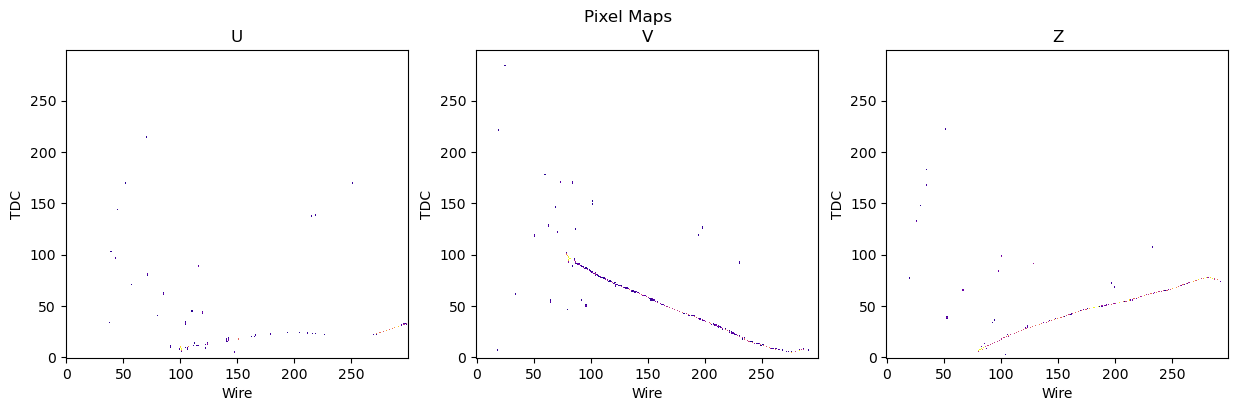

In [16]:
plot_image(maps[2])

In [12]:
path_to_saved_model = "../3output_model/saved_model/3outputs_test/"
layer = tf.keras.layers.TFSMLayer(path_to_saved_model, call_endpoint='serving_default')
input_layer = tf.keras.Input(shape = (300,300, 3)) # e.g. (224, 224, 3)
outputs = layer(input_layer)
model = tf.keras.Model(input_layer, outputs)
model.summary()

I0000 00:00:1741124734.136204 3875728 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741124734.154668 3875728 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741124734.154771 3875728 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741124734.156366 3875728 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tfsm_layer (TFSMLayer)          │ [(None, 3), (None, 4), │     4,982,912 │
│                                 │ (None, 2)]             │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,982,912 (19.01 MB)

 Trainable params: 4,978,880 (18.99 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [13]:
test1 = np.transpose(maps[2], (1, 2, 0))

In [14]:
print(model.predict(np.expand_dims(test1,axis=0)))

I0000 00:00:1741124739.093851 3897770 service.cc:146] XLA service 0x7f6e8c006350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741124739.093877 3897770 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-03-04 15:45:39.103788: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-04 15:45:39.155776: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
{'output_2': array([[0.6262234 , 0.37377656]], dtype=float32), 'output_1': array([[0.24819829, 0.5375659 , 0.14040436, 0.07383154]], dtype=float32), 'output_0': array([[0.14271645, 0.00666397, 0.85061955]], dtype=float32)}


I0000 00:00:1741124739.727501 3897770 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [15]:
label

,flavour,protons,pions
0,0,1,0
1,2,1,1
2,2,1,0
